In [34]:
import pandas as pd

data_path = '../data/raw/letterboxd-hdunkel-2024-11-09-19-17-utc/diary.csv'
df = pd.read_csv(data_path)


In [35]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# check for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

Date                0
Name                0
Year                0
Letterboxd URI      0
Rating              0
Rewatch           111
Tags              115
Watched Date        0
dtype: int64
0


In [36]:
# drop the rewatch and tags columns
df = df.drop(columns=['Rewatch', 'Tags', 'Letterboxd URI', 'Date'])

# rename the columns
df = df.rename(columns={
    'Name': 'title',
    'Year': 'year',
    'Rating': 'rating',
    'Watched Date': 'watched_date',
})

print(df.columns)

Index(['title', 'year', 'rating', 'watched_date'], dtype='object')


In [37]:
# convert the watched_date column to datetime
df['watched_date'] = pd.to_datetime(df['watched_date'])

In [38]:
# multiply the rating by 2 and cast as an int
df['rating'] = df['rating'] * 2
df['rating'] = df['rating'].astype(int)

In [39]:
cleaned_data_path = '../data/processed/cleaned_letterboxd_data.csv'
df.to_csv(cleaned_data_path, index=False)

In [40]:
print(df.head())

                                 title  year  rating watched_date
0    Everything Everywhere All at Once  2022       6   2024-01-03
1                           Iron Man 3  2013       5   2024-01-06
2                                Fargo  1996       5   2024-01-23
3                 Thor: The Dark World  2013       6   2024-01-30
4  Captain America: The Winter Soldier  2014       5   2024-01-30


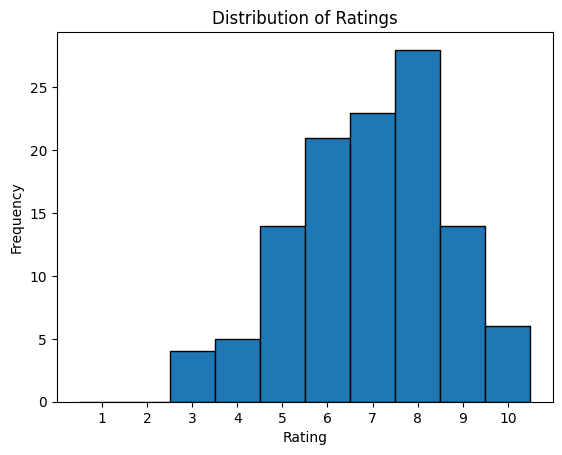

In [41]:
import matplotlib.pyplot as plt

# Define bin edges with boundaries slightly beyond the range to center 1 and 10
bins = [0.5 + i for i in range(11)]  # This will create bins centered on integers 1 to 10

plt.hist(df['rating'], bins=bins, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Set x-ticks at the centers
plt.xticks(range(1, 11))

plt.show()


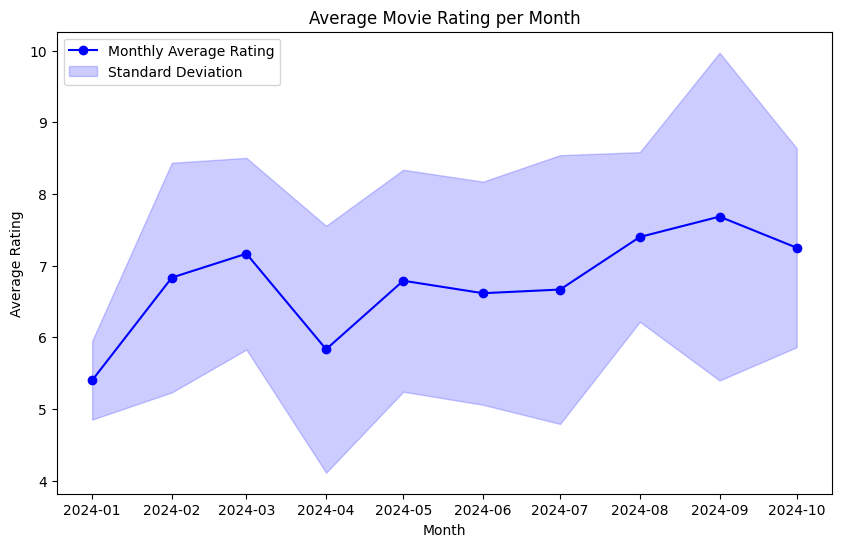

In [42]:
# Group by month and calculate the mean and standard deviation
monthly_avg = df.groupby(df['watched_date'].dt.to_period('M'))['rating'].mean()
monthly_std = df.groupby(df['watched_date'].dt.to_period('M'))['rating'].std()

# Convert the PeriodIndex to a datetime index for plotting
monthly_avg.index = monthly_avg.index.to_timestamp()
monthly_std.index = monthly_std.index.to_timestamp()

# Plot the monthly average ratings with error bars for standard deviation
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg, marker='o', color='b', label='Monthly Average Rating')
plt.fill_between(monthly_avg.index, monthly_avg - monthly_std, monthly_avg + monthly_std, color='b', alpha=0.2, label='Standard Deviation')

plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating per Month')
plt.legend()
plt.show()

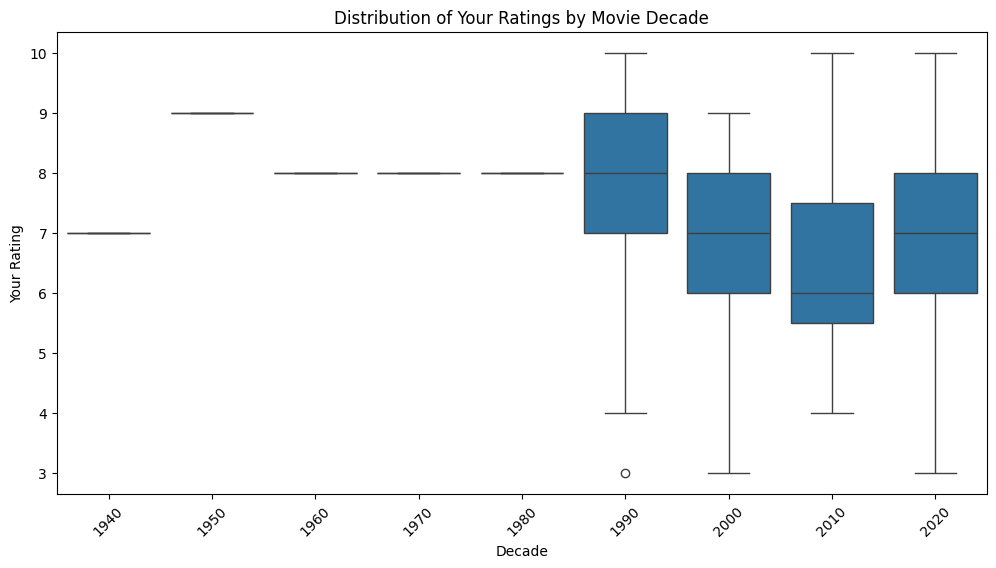

In [45]:
import seaborn as sns
import numpy as np

# Create a new column for decade
df['decade'] = (df['year'] // 10) * 10

plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y='rating', data=df)

plt.xlabel('Decade')
plt.ylabel('Your Rating')
plt.title('Distribution of Your Ratings by Movie Decade')
plt.xticks(rotation=45)
plt.show()

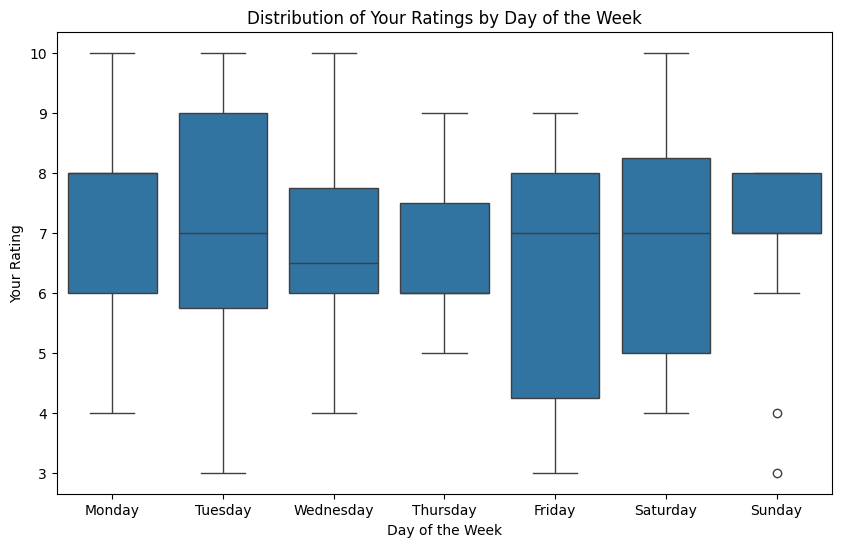

In [46]:
# make a plot for the rating per day of the week
df['day_of_week'] = df['watched_date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='rating', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xlabel('Day of the Week')
plt.ylabel('Your Rating')
plt.title('Distribution of Your Ratings by Day of the Week')
plt.show()
